In [1]:
import os
import glob
import tables
import argparse
import numpy as np
import pandas as pd
from time import time
from tables import *
from pathlib import Path
import matplotlib.pyplot as plt
from multiprocessing import Pool
from scipy.signal import find_peaks
from tables.description import Float32Col, Float64Col

In [2]:
import tables
import os

filename = '/home/tirocinio/Codice/tirocinio/Dati/DL0/acquisizione_2023_01_27/rpg0/dl0/wf_runId_00293_configId_00000_2023-01-27T14_32_51.090204.h5'

class Reader:
    def get_data_list(self,filename,startIndex=0,endIndex=-1):
        '''get data from h5 file starting by startIndex and ending at endIndex
        '''
        data_list = []
        with tables.open_file(filename,mode='r') as h5file:
            group = h5file.get_node('/waveforms')
            if endIndex == -1:
                endIndex = group._g_getnchildren()
            for i,data in enumerate(group):
                if i >= startIndex:
                    arr = data[:,-1]
                    data_list.append(arr)
                if i>=endIndex-1:
                    break
            return data_list
        
def create_directory(directory_path):
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)
        print(f"La directory '{directory_path}' è stata creata.")

reader = Reader()
data = reader.get_data_list(filename,10,15)

In [3]:
print(len(data))

5


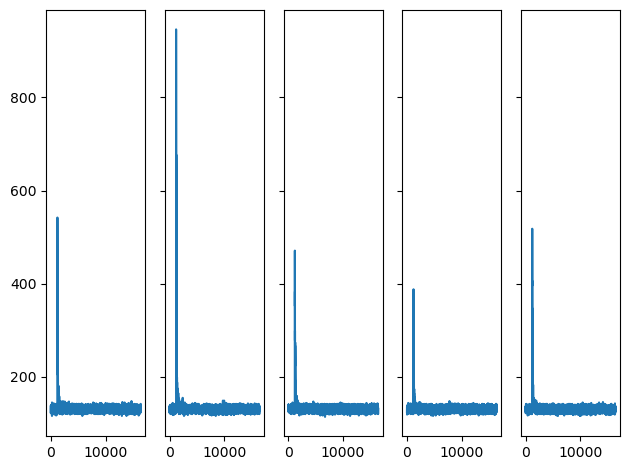

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 5, sharey=True, tight_layout=True)
for i in range(5):
    #print(len(data[i]))
    axs[i].plot(data[i])

Occhio
Tempo di Calcolo: 6.949291944503784
Estremi: [  0.  195.5 307.5 499. ]
Blocco 0: a=0.00015994570799288642,gamma=136.4748461793745
Blocco 1: a=-0.014197020092401128,gamma=192.61253732080337
Blocco 2: a=-0.002209014553626042,gamma=132.68574784833444


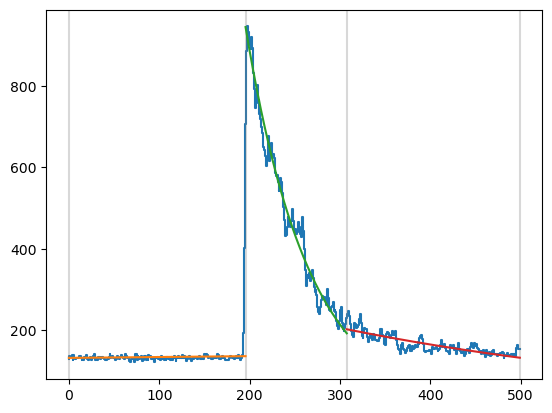

In [17]:
from astropy.stats import Events, bayesian_blocks
import numpy as np
from bb_exponential import ExponentialBlocks_Events, test_bb_exp, ExponentialBlocks_Events_Alt_2
t=np.arange(0,500)
x=data[1][1000:1500]
test_bb_exp(t,x,ExponentialBlocks_Events_Alt_2,ncp_prior=1000)

Occhio
Tempo di Calcolo: 0.28439760208129883
Estremi: [ 0. 14.]
Blocco 0: a=0.6663241752908087,gamma=21835.38436940294


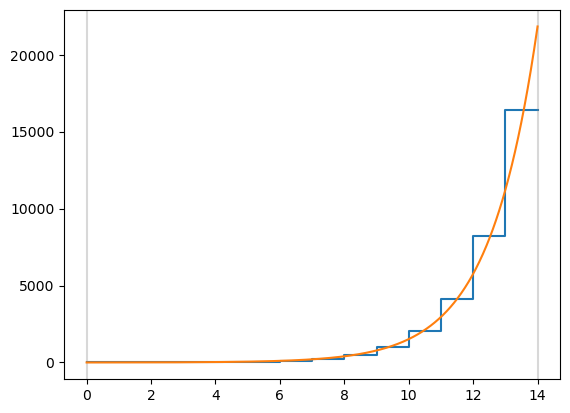

In [19]:
t=np.arange(0,15)
x=np.floor(np.power(2,t))
test_bb_exp(t,x,ExponentialBlocks_Events_Alt_2,ncp_prior=100000)